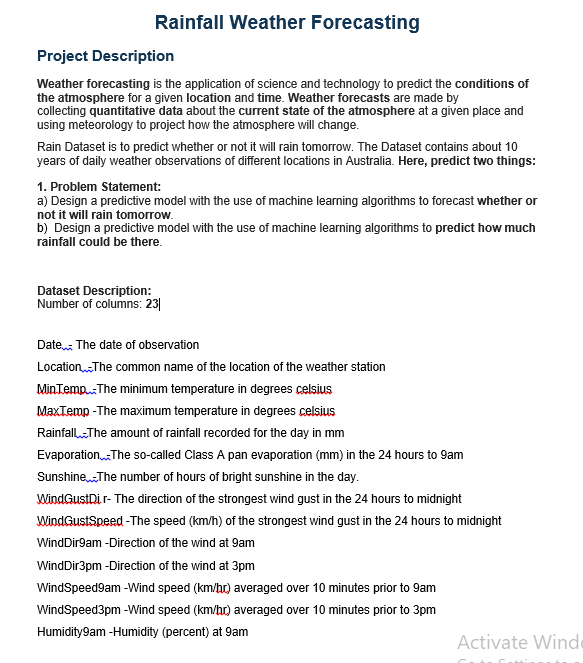
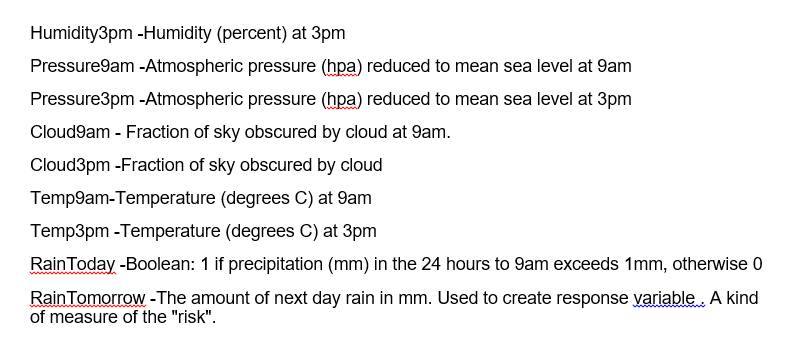

Dataset Link-  
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Rainfall%20Forecast/Rainfall.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, classification_report, accuracy_score,confusion_matrix,mean_absolute_error,mean_squared_error,roc_auc_score


In [35]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


Data Cleaning

In [36]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Handling missing values
df = df.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])

# Fill numerical columns with the median value
num_cols = df.select_dtypes(include=['float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with the mode value
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8425 non-null   datetime64[ns]
 1   Location       8425 non-null   object        
 2   MinTemp        8425 non-null   float64       
 3   MaxTemp        8425 non-null   float64       
 4   Rainfall       8425 non-null   float64       
 5   WindGustDir    8425 non-null   object        
 6   WindGustSpeed  8425 non-null   float64       
 7   WindDir9am     8425 non-null   object        
 8   WindDir3pm     8425 non-null   object        
 9   WindSpeed9am   8425 non-null   float64       
 10  WindSpeed3pm   8425 non-null   float64       
 11  Humidity9am    8425 non-null   float64       
 12  Humidity3pm    8425 non-null   float64       
 13  Pressure9am    8425 non-null   float64       
 14  Pressure3pm    8425 non-null   float64       
 15  Temp9am        8425 n

In [13]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
# visualization

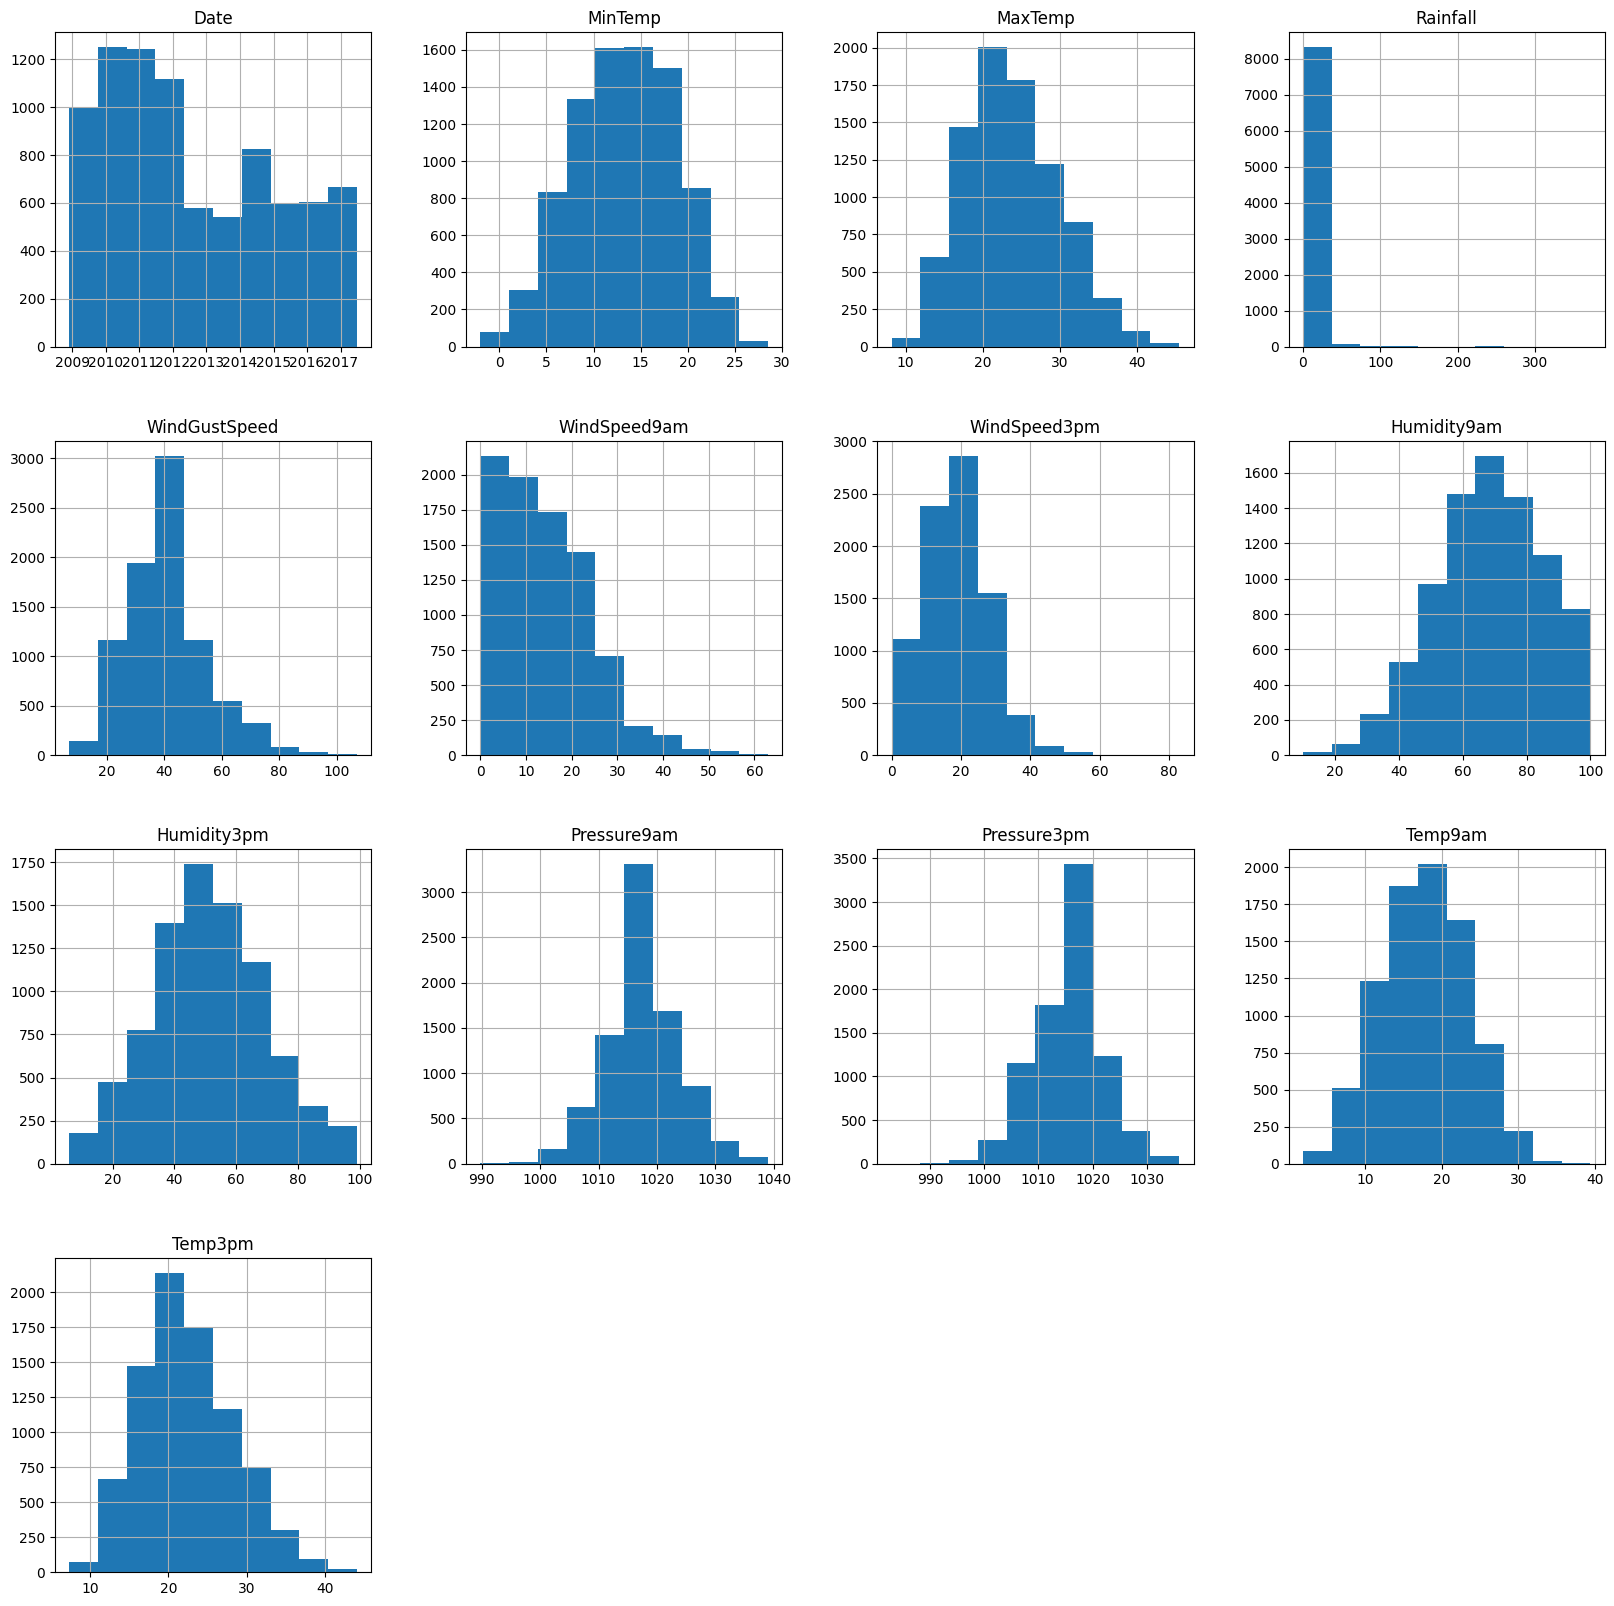

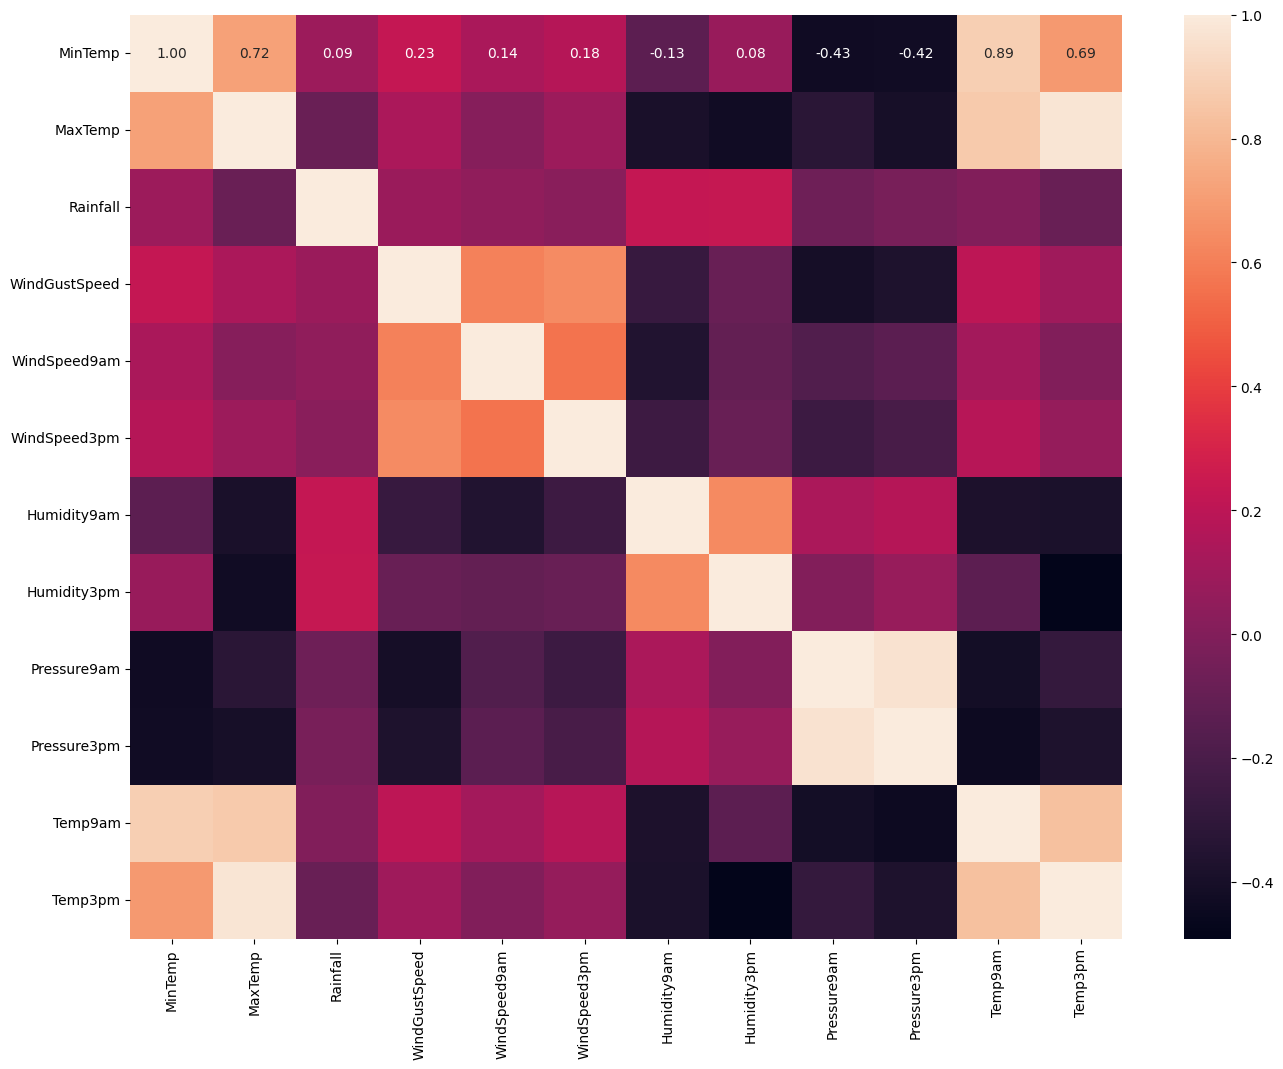

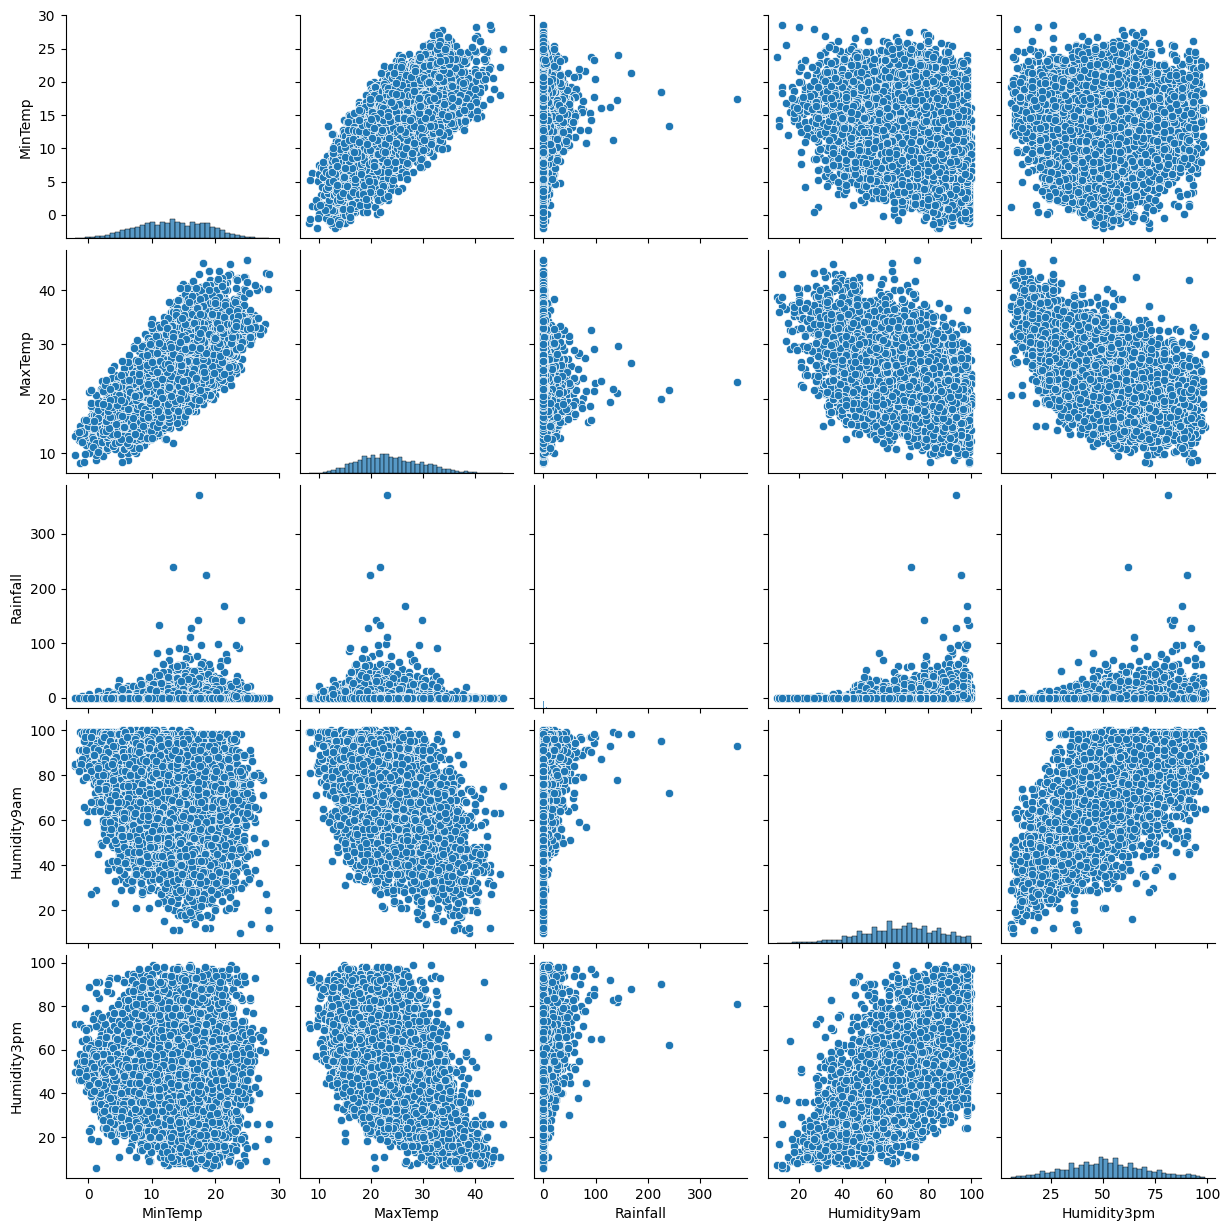

In [15]:
# Exclude non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_data = df[numeric_cols]

# Plotting distributions of numerical columns
df.hist(figsize=(20, 20))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f')
plt.show()

# Pairplot for a subset of features
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm']])
plt.show()


In [ ]:
#Handling Outliers

In [38]:
# Using IQR to handle outliers
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
 Checking for Skewness

In [39]:
# Skewness
skewness = df[num_cols].skew().sort_values(ascending=False)
print(skewness)

Rainfall         3.253339
WindSpeed9am     0.681067
WindGustSpeed    0.305865
Temp3pm          0.233176
MaxTemp          0.209043
WindSpeed3pm     0.200587
Humidity3pm      0.135057
Pressure9am      0.014981
Pressure3pm     -0.009121
MinTemp         -0.079383
Temp9am         -0.117672
Humidity9am     -0.140893
dtype: float64


In [ ]:
Checking for Multicollinearity

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = df[num_cols].columns
vif_data['VIF'] = [variance_inflation_factor(df[num_cols].values, i) for i in range(len(df[num_cols].columns))]

print(vif_data)

          feature            VIF
0         MinTemp      46.869977
1         MaxTemp     454.365972
2        Rainfall       1.240759
3   WindGustSpeed      23.538479
4    WindSpeed9am       5.672639
5    WindSpeed3pm       9.306275
6     Humidity9am      62.349702
7     Humidity3pm      44.650170
8     Pressure9am  561227.893469
9     Pressure3pm  558263.098321
10        Temp9am     176.764963
11        Temp3pm     540.732666


In [ ]:
# Handle multicollinearity

In [41]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [42]:
threshold = 10  # Adjust this threshold as needed

# Identify variables with high VIF and decide on a strategy
high_vif_features = vif_data[vif_data['VIF'] > threshold]['feature'].tolist()

if high_vif_features:
    print(f"Variables with high VIF (> {threshold}): {', '.join(high_vif_features)}")
    
    # Example: Remove high VIF features from num_cols
    num_cols = [col for col in num_cols if col not in high_vif_features]
    
    print("Updated num_cols after handling multicollinearity:")
    print(num_cols)
else:
    print("No variables with high VIF (> 10) found.")

Variables with high VIF (> 10): MinTemp, MaxTemp, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm
Updated num_cols after handling multicollinearity:
['Rainfall', 'WindSpeed9am', 'WindSpeed3pm']


Feature Engineering

In [43]:
# Encoding catogorical column using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df
    

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1.0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0
1,2008-12-02,1.0,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0
2,2008-12-03,1.0,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0
3,2008-12-04,1.0,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0
4,2008-12-05,1.0,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,9.0,2.8,23.4,0.0,0.0,31.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,0.0
8421,2017-06-22,9.0,3.6,25.3,0.0,6.0,22.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,0.0
8422,2017-06-23,9.0,5.4,26.9,0.0,3.0,37.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,0.0
8423,2017-06-24,9.0,7.8,27.0,0.0,9.0,28.0,10.0,3.0,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0.0,0.0


In [44]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1.0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0
1,2008-12-02,1.0,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0


In [26]:
# Model Building

a. Forecasting Rain Tomorrow (Classification)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6270 entries, 0 to 8424
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6270 non-null   datetime64[ns]
 1   Location       6270 non-null   float64       
 2   MinTemp        6270 non-null   float64       
 3   MaxTemp        6270 non-null   float64       
 4   Rainfall       6270 non-null   float64       
 5   WindGustDir    6270 non-null   float64       
 6   WindGustSpeed  6270 non-null   float64       
 7   WindDir9am     6270 non-null   float64       
 8   WindDir3pm     6270 non-null   float64       
 9   WindSpeed9am   6270 non-null   float64       
 10  WindSpeed3pm   6270 non-null   float64       
 11  Humidity9am    6270 non-null   float64       
 12  Humidity3pm    6270 non-null   float64       
 13  Pressure9am    6270 non-null   float64       
 14  Pressure3pm    6270 non-null   float64       
 15  Temp9am        6270 non-nu

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Splitting the data
X = df.drop(columns=['RainTomorrow', 'Date'])
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Model evaluation
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save the model

import joblib

joblib.dump(clf, 'rain_tomorrow_model.pkl')


[[1040   15]
 [  97  102]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1055
         1.0       0.87      0.51      0.65       199

    accuracy                           0.91      1254
   macro avg       0.89      0.75      0.80      1254
weighted avg       0.91      0.91      0.90      1254



['rain_tomorrow_model.pkl']

b. Predicting Rainfall Amount (Regression)

In [51]:
# Splitting the data
X = df.drop(columns=['Rainfall', 'Date'])
y = df['Rainfall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

# Model evaluation
y_pred = reg.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Save the model
joblib.dump(reg, 'rainfall_amount_model.pkl')


RMSE: 0.15825930108396574


['rainfall_amount_model.pkl']

In [ ]:
Predictions and Model Loading

In [52]:
# Load the models
clf = joblib.load('rain_tomorrow_model.pkl')
reg = joblib.load('rainfall_amount_model.pkl')

# Example predictions
example_data = X_test[0].reshape(1, -1)
print('Rain Tomorrow Prediction:', clf.predict(example_data))
print('Rainfall Amount Prediction:', reg.predict(example_data))


Rain Tomorrow Prediction: [0.]
Rainfall Amount Prediction: [1.548]
